In [1]:
# !pip install rebound

""" Un-comment this out if you do not have rebound installed yet """

' Un-comment this out if you do not have rebound installed yet '

In [2]:
import rebound
print(rebound.__version__)
import numpy as np
import matplotlib.pyplot as plt

sim = rebound.Simulation();
G = 1
sim.G = G
sim.integrator = "leapfrog"
sim.dt = 0.15
sim.softening = .1
sim.collision = 'direct';
sim.collision_resolve = 'merge';

4.4.8


In [3]:
def add_plummer_sphere(sim, N, mass_total, pos_offset, vel_offset, scale_radius):
  
    # v_max_0 = 0
    """Adds a Plummer sphere galaxy to the simulation."""
    for i in range(N):
        r = scale_radius / np.sqrt(np.random.random()**(-2/3) - 1)
        theta = np.arccos(2 * np.random.random() - 1)
        phi = 2 * np.pi * np.random.random()

        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)

        # Plummer velocities (isotropic approximation)
        v_max = np.sqrt(G * mass_total / (r + scale_radius))
        # if v_max > v_max_0:
        #     v_max_0 = v_max
        v = v_max * np.random.random()
        theta_v = np.arccos(2 * np.random.random() - 1)
        phi_v = 2 * np.pi * np.random.random()

        vx = v * np.sin(theta_v) * np.cos(phi_v)
        vy = v * np.sin(theta_v) * np.sin(phi_v)
        vz = v * np.cos(theta_v)

        sim.add(
            x=x + pos_offset[0], y=y + pos_offset[1], z=z + pos_offset[2],
            vx=vx + vel_offset[0], vy=vy + vel_offset[1], vz=vz + vel_offset[2],
            m=mass_total / N
        )
    # print(v_max_0)


In [4]:
# Galaxy parameters
N_small = 500
N_large = 2000
mass_galaxy_small = .5
mass_galaxy_large = 2.0
scale_radius_small = 1.5
scale_radius_large = 2.

# Add two galaxies
add_plummer_sphere(sim, N_small, mass_galaxy_small, [-10, -10, 0], [.5, .5, 0], scale_radius_small)
add_plummer_sphere(sim, N_large, mass_galaxy_large, [10, 10, 0], [-.5, -.5, 0], scale_radius_large)

In [5]:
NTOTAL = N_small + N_large

# Integrate and store snapshots
n_times = 101
positions = np.empty((n_times,NTOTAL,3))
times = np.linspace(0, 40, n_times)
i = 0

for t in times:
    sim.integrate(t)
    snapshot = np.array([[p.x, p.y, p.z] for p in sim.particles])
    positions[i] = snapshot
    i += 1
    if i % 10 == 0:
        print(f'{i}')
        


## This will output the time the integrator has successfully completed (every 10 units) as a progress check and confirmation

10
20
30
40
50
60
70
80
90
100


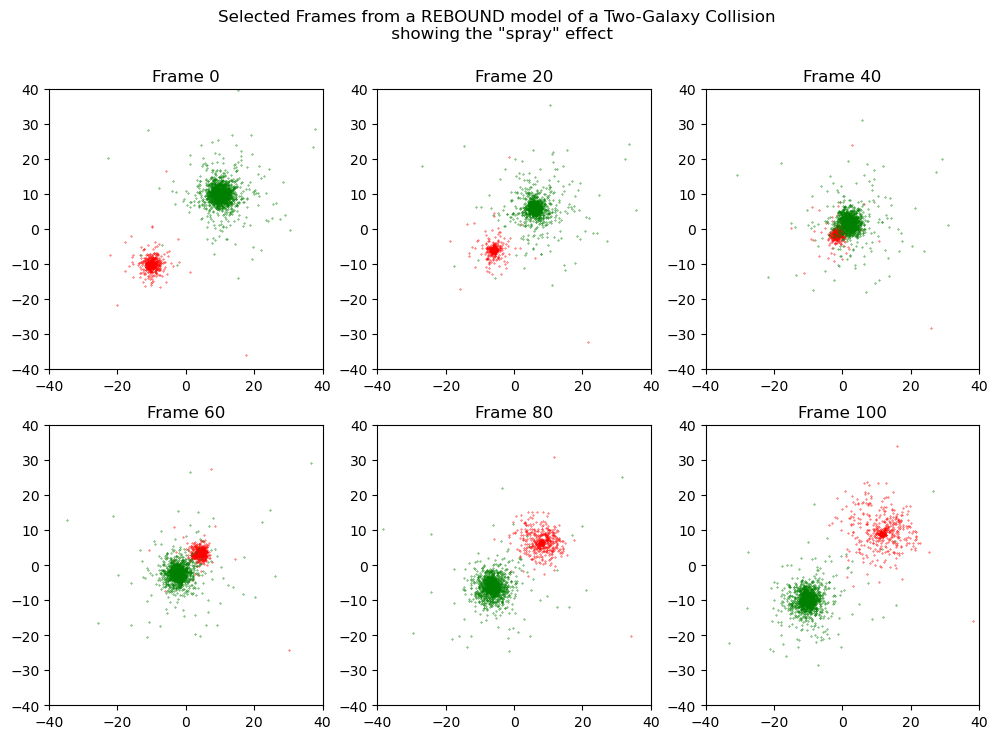

In [6]:
fig, ax = plt.subplots(2,3,figsize=(12,8))
fig.suptitle('Selected Frames from a REBOUND model of a Two-Galaxy Collision \n showing the "spray" effect')
ax = ax.flatten()
for i in [0,1,2,3,4,5]:
    frame = positions[i*20]
    ax[i].scatter(frame[:N_small,0],frame[:N_small,1], .1, color='r')
    ax[i].scatter(frame[N_small:,0],frame[N_small:,1], .1, color='g')
    ax[i].set_xbound(-40,40)
    ax[i].set_ybound(-40,40)
    ax[i].set_title(f'Frame {i*20}')

# plt.savefig('Collision.png')

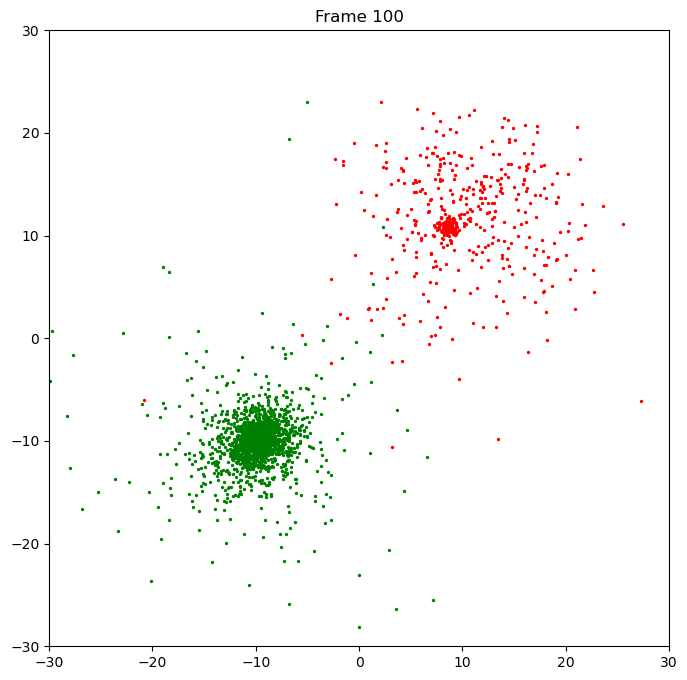

In [10]:
from IPython.display import clear_output
import time

fig, ax = plt.subplots(figsize=(8,8))

for i in range(n_times):
    ax.clear()
    frame = positions[i]
    ax.scatter(frame[:N_small,0],frame[:N_small,1], 2, color='r')
    ax.scatter(frame[N_small:,0],frame[N_small:,1], 2, color='g')
    ax.set_xbound(-30,30)
    ax.set_ybound(-30,30)
    ax.set_title(f'Frame {i}')
    clear_output(wait=True)
    display(fig)
    plt.pause(0.02)

In [8]:
sim.cite()

Simulations in this paper made use of the REBOUND N-body code \citep{rebound}. 


@ARTICLE{rebound,
       author = {{Rein}, H. and {Liu}, S. -F.},
        title = "{REBOUND: an open-source multi-purpose N-body code for collisional dynamics}",
      journal = {\aap},
     keywords = {methods: numerical, planets and satellites: rings, protoplanetary disks, Astrophysics - Earth and Planetary Astrophysics, Astrophysics - Instrumentation and Methods for Astrophysics, Mathematics - Dynamical Systems, Physics - Computational Physics},
         year = 2012,
        month = jan,
       volume = {537},
          eid = {A128},
        pages = {A128},
          doi = {10.1051/0004-6361/201118085},
archivePrefix = {arXiv},
       eprint = {1110.4876},
 primaryClass = {astro-ph.EP},
       adsurl = {https://ui.adsabs.harvard.edu/abs/2012A&A...537A.128R},
      adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}

